The 2-dimensional coupled heat-wave equations
=============================================

It is assumed that the [2D wave equation](https://g-haine.github.io/scrimp/examples/wave.html), the [2D wave equation in co-energy formulation](https://g-haine.github.io/scrimp/examples/wave_coenergy.html) and the [2D heat equation](https://g-haine.github.io/scrimp/examples/heat.html) have already been studied.

The objective of this example is to deal with interconnection in the sense of port-Hamiltonian systems.

We are interested in the coupled heat-wave system which can be formulated as follows: let $\Omega := \Omega_W \cup \Omega_H$ be a bounded domain in $\mathbb{R}^2$ such that $\Omega_W \cap \Omega_H = \emptyset$, we denote $\Gamma_I := \partial\Omega_W \cap \partial\Omega_H$ the interface between the two domains, and $\Gamma_W := \partial\Omega_W \setminus \Gamma_I$ and $\Gamma_H := \partial\Omega_H \setminus \Gamma_I$. The system of equations reads
$$
    \left\lbrace
    \begin{array}{rcl}
    \partial_t T(t,x) &=& {\rm div}\left( {\rm grad}\left( T(t,x) \right)\right), \quad \forall t\ge0, x \in \Omega_H, \\
    \partial_{tt}^2 w(t,x) &=& {\rm div}\left( {\rm grad}\left( T(t,x) \right)\right), \quad \forall t\ge0, x \in \Omega_H, \\
    T(t,s) &=& 0, \quad \forall t\ge0, s \in \Gamma_H, \\
    w(t,s) &=& 0, \quad \forall t\ge0, s \in \Gamma_W, \\
    \end{array}
    \right.
$$
together with the transmission conditions across the interface
$$
    \left\lbrace
    \begin{array}{rcl}
    T(t,s) &=& \partial_t w(t,s), \quad \forall t\ge0, s \in \Gamma_I, \\
    \partial_{n_H} T(t,s) &=& - \partial_{n_W} w(t,s), \quad \forall t\ge0, s \in \Gamma_I, \\
    \end{array}
    \right.
$$
where $n_H$ is the outward normal to $\Omega_H$ and $n_W$ is the outward normal to $\Omega_W$. Hence, $n_H = -n_W$ on $\Gamma_I$.

Port-Hamiltonian framework
--------------------------

* The heat equation

The heat equation reads
$$
    \begin{pmatrix} \partial_t T \\ e_q \end{pmatrix} = 
    \begin{bmatrix} 0 & - {\rm div} \\ - {\rm grad} & 0 \end{bmatrix} 
    \begin{pmatrix} T \\ e_Q \end{pmatrix},
$$
together with the boundary ports
$$
    \left\lbrace
    \begin{array}{rcl}
    u^I_H &=& T, \quad \Gamma_I, \\
    y^I_H &=& e_Q \cdot n_H, \quad \Gamma_I,
    \end{array}
    \right.
$$
and
$$
    \left\lbrace
    \begin{array}{rcl}
    u_H &=& T, \quad \Gamma_H, \\
    y_H &=& e_Q \cdot n_H, \quad \Gamma_H.
    \end{array}
    \right.
$$

* The wave equation

The Dirichlet boundary condition has to be relaxed by $\partial_t w = 0$ to fit the port-Hamiltonian framework. Providing this adaptation and the notation $p := \partial_t w$ and $q := {\rm grad}\left(w\right)$, the wave equation reads
$$
    \begin{pmatrix} \partial_t q \\ \partial_t p \end{pmatrix} = 
    \begin{bmatrix} 0 & {\rm grad} \\ {\rm div} & 0 \end{bmatrix} 
    \begin{pmatrix} q \\ p \end{pmatrix},
$$
together with the boundary ports
$$
    \left\lbrace
    \begin{array}{rcl}
    u^I_W &=& q \cdot n_W, \quad \Gamma_I, \\
    y^I_W &=& p, \quad \Gamma_I,
    \end{array}
    \right.
$$
and
$$
    \left\lbrace
    \begin{array}{rcl}
    u_W &=& q \cdot n_W, \quad \Gamma_H, \\
    y_W &=& p, \quad \Gamma_H.
    \end{array}
    \right.
$$

* The interconnection

The transmission condition at the interface may be recast as a power-preserving interconnection. It can be either a **gyrator** or a **tranformer** interconnection, depending on the chosen causality for each system. We the above choices, we have a **gyrator interconnection**, indeed, one has
$$
    u^I_H = y^I_w, \qquad u^I_W = y^I_H.
$$

Structure-preserving discretization
-----------------------------------

* The heat equation

We use the div-div formulation already presented in the [2D heat equation](https://g-haine.github.io/scrimp/examples/heat.html) example, *i.e.* we obtain the following system
$$
    \underbrace{\begin{bmatrix}
    M_T & 0 & 0 & 0 \\
    0 & M_Q & 0 & 0 \\
    0 & 0 & M^I_H & 0 \\
    0 & 0 & 0 & M_H
    \end{bmatrix}}_{= M}
    \begin{pmatrix}
    \frac{\rm d}{{\rm d}t} \underline{T}(t) \\
    \underline{e_Q}(t) \\
    -\underline{y^I_H}(t) \\
    -\underline{y_H}(t)
    \end{pmatrix}
    =
    \underbrace{\begin{bmatrix}
    0 & D & 0 & 0 \\
    -D^\top & 0 & B^I_H & B_H \\
    0 & -(B^I_H)^\top & 0 & 0 \\
    0 & -(B_H)^\top & 0 & 0
    \end{bmatrix}}_{= J}
    \begin{pmatrix}
    \underline{T}(t) \\
    \underline{e_Q}(t) \\
    \underline{u^I_H}(t) \\
    \underline{u_H}(t)
    \end{pmatrix},
$$

* The wave equation

We use the grad-grad formulation already presented in the [2D wave equation](https://g-haine.github.io/scrimp/examples/wave.html) example, *i.e.* we obtain the following system
$$
    \underbrace{\begin{bmatrix}
    M_q & 0 & 0 & 0 \\
    0 & M_p & 0 & 0 \\
    0 & 0 & M^I_W & 0 \\
    0 & 0 & 0 & M_W
    \end{bmatrix}}_{= M}
    \begin{pmatrix}
    \frac{\rm d}{{\rm d}t} \underline{q}(t) \\
    \frac{\rm d}{{\rm d}t} \underline{p}(t) \\
    -\underline{y^I_W}(t) \\
    \underline{u_W}(t)
    \end{pmatrix}
    =
    \underbrace{\begin{bmatrix}
    0 & D & 0 & 0 \\
    -D^\top & 0 & B^I_W & -B_W^\top \\
    0 & -(B^I_W)^\top & 0 & 0 \\
    0 & B_W & 0 & 0
    \end{bmatrix}}_{= J}
    \begin{pmatrix}
    \underline{q}(t) \\
    \underline{p}(t) \\
    \underline{u^I_W}(t) \\
    -\underline{y_W}(t)
    \end{pmatrix},
$$

* The transformer interconnection

This condition is easy to implement, and leads to
$$
    M^I_H \underline{u^I_H}(t) = M^I_W \underline{y^I_W}(t), \qquad M^I_W \underline{u^I_W}(t) = M^I_H \underline{y^I_H}(t).
$$

Simulation
----------

Let us start as usual, but using now the `Concentric` built-in geometry.

In [1]:
# Import scrimp
import scrimp as S

# Init the distributed port-Hamiltonian system
hw = S.DPHS("real")

# Set the domain (using the built-in geometry `Concentric`)
# Labels: Disk = 1, Annulus = 2, Interface = 10, Boundary = 20
omega = S.Domain("Concentric", {"R": 1.0, "r": 0.6, "h": 0.1})

# And add it to the dphs
hw.set_domain(omega)

A model with real unknowns has been initialized
A disk of radius 0.6 surrounded by an annulus of radii 0.6 and 1.0 has been meshed
Domain has been set
Domain is set and contains 1 mesh(es):
=== on mesh 0 of dim 2
* Subdomains are: {'Omega_Disk': 1, 'Omega_Annulus': 2}
* Boundaries are: {'Interface': 10, 'Gamma': 20}
domain: Concentric has been set


message from gf_mesh_get follow:
gfMesh object in dimension 2 with 451 points and 835 elements



It is important to remember here one of the objective of this example: to understand the `region` keyword.

For our study case, the heat equation will lie on a region `heat_region`, while the wave equation will lie on another region `wave_region`. And this has to be stated when defining the states and co-states, and everytime an integral (either the *weak forms* or the *Hamiltonian terms*) occurs.

In [2]:
# Define the states and costates, needs the heat and wave region's labels
heat_region = 1
wave_region = 2
states = [
    S.State("T", "Temperature", "scalar-field", region=heat_region),
    S.State("p", "Velocity", "scalar-field", region=wave_region),
    S.State("q", "Stress", "vector-field", region=wave_region),
]
# Use of the `substituted=True` keyword to get the co-energy formulation
costates = [
    S.CoState("T", "Temperature", states[0], substituted=True),
    S.CoState("p", "Velocity", states[1], substituted=True),
    S.CoState("q", "Stress", states[2], substituted=True),
]

# Add them to the dphs
for state in states:
    hw.add_state(state)
for costate in costates:
    hw.add_costate(costate)

state: T has been added
state: p has been added
state: q has been added
port: T has been added on region 1
costate: T has been added to state: T
state: T has new costate: T
port: p has been added on region 2
costate: p has been added to state: p
state: p has new costate: p
port: q has been added on region 2
costate: q has been added to state: q
state: q has new costate: q


The same is true for the resistive port for the heat equation.

In [3]:
# Define the algebraic port
ports = [
    S.Port("Heat flux", "e_Q", "e_Q", "vector-field", substituted=True, region=heat_region),
]

# Add it to the dphs
for port in ports:
    hw.add_port(port)

# Define the control ports
control_ports = [
    S.Control_Port(
        "Interface Heat", 
        "U_T", 
        "Heat flux", 
        "Y_T", 
        "Temperature",
        "scalar-field",
        region=10, 
        position="effort"
    ),
    S.Control_Port(
        "Interface Wave", 
        "U_w", 
        "Velocity", 
        "Y_w", 
        "Velocity", 
        "scalar-field", 
        region=10, 
        position="effort"
    ),
    # This port will be either for the wave or the heat equation
    # It corresponds to the exterior circle of radius R
    S.Control_Port( 
        "Boundary", 
        "U_bnd", 
        "0", 
        "Y_bnd", 
        ".", 
        "scalar-field", 
        region=20, 
        position="flow"
    ),
]

# Add it to the dphs
for ctrl_port in control_ports:
    hw.add_control_port(ctrl_port)

port: Heat flux has been added on region 1
port: Interface Heat has been added on region 10
port: Interface Wave has been added on region 10
port: Boundary has been added on region 20


For the FEM choices, see the previous examples.

In [4]:
# Define the Finite Elements Method of each port
k = 1
FEMs = [
    S.FEM("T", k, "DG"),
    S.FEM("Heat flux", k+1, "CG"),
    S.FEM("Interface Heat", k, "DG"),
    S.FEM("p", k+1, "CG"),
    S.FEM("q", k, "DG"),
    S.FEM("Interface Wave", k, "DG"),
    S.FEM("Boundary", k, "DG"),
]

# Add them to the dphs
for FEM in FEMs:
    hw.add_FEM(FEM)

FEM_PK_DISCONTINUOUS(2,1) has been set for port T
FEM_PK(2,2) has been set for port Heat flux
FEM_PK_DISCONTINUOUS(2,1) has been set for port Interface Heat
FEM_PK(2,2) has been set for port p
FEM_PK_DISCONTINUOUS(2,1) has been set for port q
FEM_PK_DISCONTINUOUS(2,1) has been set for port Interface Wave
FEM_PK_DISCONTINUOUS(2,1) has been set for port Boundary


message from gf_mesh_fem_get follow:
gfMeshFem object in dimension 2 with 451 points, 835 elements and 2505 degrees of freedom

message from gf_mesh_fem_get follow:
gfMeshFem object in dimension 2 with 451 points, 835 elements and 3468 degrees of freedom

message from gf_mesh_fem_get follow:
gfMeshFem object in dimension 2 with 451 points, 835 elements and 2505 degrees of freedom

message from gf_mesh_fem_get follow:
gfMeshFem object in dimension 2 with 451 points, 835 elements and 1734 degrees of freedom

message from gf_mesh_fem_get follow:
gfMeshFem object in dimension 2 with 451 points, 835 elements and 5010 degrees of freedom

message from gf_mesh_fem_get follow:
gfMeshFem object in dimension 2 with 451 points, 835 elements and 2505 degrees of freedom

message from gf_mesh_fem_get follow:
gfMeshFem object in dimension 2 with 451 points, 835 elements and 2505 degrees of freedom



The `Brick` object does not have an *optional* `region` keyword, it is mandatory: more precisely, it requires a list of regions as third argument.

In [5]:
# Define the pHs via `Brick` == non-zero block matrices == variational terms
# Since we use co-energy formulation, constitutive relations are already taken into
# account in the mass matrices M_q and M_p
bricks = [
    # === Heat: div-div
    S.Brick("M_T", "T*Test_T", [heat_region], dt=True, position="flow"),
    S.Brick("M_Q", "e_Q.Test_e_Q", [heat_region], position="flow"),
    S.Brick("M_Y_T", "Y_T*Test_Y_T", [10], position="flow"),

    S.Brick("D_T", "-Div(e_Q)*Test_T", [heat_region], position="effort"),
    S.Brick("D_T^T", "T*Div(Test_e_Q)", [heat_region], position="effort"),
    S.Brick("B_T", "U_T*Test_e_Q.Normal", [10], position="effort"),
    S.Brick("B_T^T", "e_Q.Normal*Test_Y_T", [10], position="effort"),

    # === Wave: grad-grad
    S.Brick("M_p", "p*Test_p", [wave_region], dt=True, position="flow"),
    S.Brick("M_q", "q.Test_q", [wave_region], dt=True, position="flow"),
    S.Brick("M_Y_w", "Y_w*Test_Y_w", [10], position="flow"),

    S.Brick("D_w", "-q.Grad(Test_p)", [wave_region], position="effort"),
    S.Brick("-D_w^T", "Grad(p).Test_q", [wave_region], position="effort"),
    S.Brick("B_w", "U_w*Test_p", [10], position="effort"),
    S.Brick("B_w^T", "p*Test_Y_w", [10], position="effort"),
]
# === Boundary depends on where is the heat equation / wave equation
if wave_region==1:
    bricks.append(S.Brick("M_Y_bnd", "Y_bnd*Test_Y_bnd", [20], position="flow"))
    bricks.append(S.Brick("B_bnd", "U_bnd*Test_e_Q.Normal", [20], position="effort"))
    bricks.append(S.Brick("B_bnd^T", "e_Q.Normal*Test_Y_bnd", [20], position="effort"))
else:
    bricks.append(S.Brick("M_Y_bnd", "U_bnd*Test_Y_bnd", [20], position="flow"))
    bricks.append(S.Brick("B_bnd", "Y_bnd*Test_p", [20], position="effort"))
    bricks.append(S.Brick("B_bnd^T", "p*Test_Y_bnd", [20], position="effort"))
for brick in bricks:
    hw.add_brick(brick)

Linear form  'T*Test_T' has been added as: flow relation on region: 1 of mesh: 0
Linear form  'e_Q.Test_e_Q' has been added as: flow relation on region: 1 of mesh: 0
Linear form  'Y_T*Test_Y_T' has been added as: flow relation on region: 10 of mesh: 0
Linear form  '-Div(e_Q)*Test_T' has been added as: effort relation on region: 1 of mesh: 0
Linear form  'T*Div(Test_e_Q)' has been added as: effort relation on region: 1 of mesh: 0
Linear form  'U_T*Test_e_Q.Normal' has been added as: effort relation on region: 10 of mesh: 0
Linear form  'e_Q.Normal*Test_Y_T' has been added as: effort relation on region: 10 of mesh: 0
Linear form  'p*Test_p' has been added as: flow relation on region: 2 of mesh: 0
Linear form  'q.Test_q' has been added as: flow relation on region: 2 of mesh: 0
Linear form  'Y_w*Test_Y_w' has been added as: flow relation on region: 10 of mesh: 0
Linear form  '-q.Grad(Test_p)' has been added as: effort relation on region: 2 of mesh: 0
Linear form  'Grad(p).Test_q' has been 

Finally, the **gyrator** interconnection for a system is just an output feedback from the other. The subtility is that, while the normal along $\Gamma_I$ depends from which side it is computed *on paper*, this is not the case *numerically*: a minus sign is necessary.

In [6]:
# Set the controls
# === Gyrator interconnection
hw.set_control("Interface Heat", "Y_w") 
# CAREFUL: the numerical normal is the same for both sub-domains! Hence the minus sign. 
hw.set_control("Interface Wave", "-Y_T") 
# === Dirichlet boundary condition
hw.set_control("Boundary", "0.")

# Set the initial data
hw.set_initial_value("T", "5.*np.exp(-25*((x-0.6)*(x-0.6)+y*y))")
hw.set_initial_value("p", "5.*np.exp(-25*((x-0.6)*(x-0.6)+y*y))")
hw.set_initial_value("q", "[0.,0.]")

## Solve in time
# Define the time scheme ("bdf" is backward differentiation formula)
hw.set_time_scheme(ts_type="bdf",
                   t_f=15.,
                   dt=0.001,
                   dt_save=0.05,
                   ksp_type="preonly",
                   pc_type="lu",
                   pc_factor_mat_solver_type="mumps",
                   )

# Solve
hw.solve()

Linear form  '-U_T*Test_U_T' has been added as: constitutive relation on region: 10 of mesh: 0
Source form  'Y_w' has been added as: source relation on region: 10 of mesh: 0
Control port: Interface Heat has been set to: U_T = Y_w on region: 10 of mesh: 0
Linear form  '-U_w*Test_U_w' has been added as: constitutive relation on region: 10 of mesh: 0
Source form  '-Y_T' has been added as: source relation on region: 10 of mesh: 0
Control port: Interface Wave has been set to: U_w = -Y_T on region: 10 of mesh: 0
Linear form  '-U_bnd*Test_U_bnd' has been added as: constitutive relation on region: 20 of mesh: 0
Source form  '0.' has been added as: source relation on region: 20 of mesh: 0
Control port: Boundary has been set to: U_bnd = 0. on region: 20 of mesh: 0
T has been set
T has been initialized with: 5.*np.exp(-25*((x-0.6)*(x-0.6)+y*y))
p has been set
p has been initialized with: 5.*np.exp(-25*((x-0.6)*(x-0.6)+y*y))
q has been set
q has been initialized with: [0.,0.]
Simulation is startin

i=       0 t=       0 * (0s)   dt=   0.001        
i=      51 t=0.0505078 * (1s)   dt=0.00557327           
i=      58 t=0.103267 * (2s)   dt=0.00997678         
i=      63 t=0.154871 * (2s)   dt=0.0110915        
i=      68 t=0.209917 * (2s)   dt=0.0109465        
i=      73 t=0.265324 * (2s)   dt=0.0110208        
i=      78 t=0.321855 * (2s)   dt=0.011358         
i=      83 t=0.379547 * (3s)   dt=0.0118845        
i=      88 t=0.439201 * (3s)   dt=0.0118569        
i=      93 t=0.499475 * (3s)   dt=0.0118472        
i=      98 t=0.559031 * (3s)   dt=0.0120292        
i=     103 t=0.620223 * (3s)   dt=0.0121316        
i=     108 t=0.680594 * (3s)   dt=0.0122598        
i=     113 t=0.741424 * (4s)   dt=0.0120116        
i=     118 t=0.801904 * (4s)   dt=0.0120989        
i=     123 t=0.862864 * (4s)   dt=0.012117         
i=     128 t=0.922986 * (4s)   dt=0.0121606        
i=     133 t= 0.98387 * (4s)   dt=0.0121754        
i=     138 t= 1.04432 * (4s)   dt=0.0120258        
i=    

Elapsed time: 42.09s
Steps: 1261 (3 rejected, 0 Nonlinear solver failures)
Nonlinear iterations: 1267, Linear iterations: 1267


We end as usual with the Hamiltonian plot. Since our study case is known to be strongly stable, but never exponential nor uniformly in the initial state, we may also invocate the `get_Hamiltonian` method to make a log-log view of its evolution.

Start computing the Hamiltonian
Hamiltonian has been computed in 0.4577489569783211 s
Start computing the powers (substituted ports are not automated)
Power cannot be computed for dynamic or substituted port T
Power cannot be computed for dynamic or substituted port p
Power cannot be computed for dynamic or substituted port q
Power cannot be computed for dynamic or substituted port Heat flux
Start computing the power flowing through Interface Heat
Power in Interface Heat has been computed in 0.03922720067203045 s
Start computing the power flowing through Interface Wave
Power in Interface Wave has been computed in 0.037998855113983154 s
Start computing the power flowing through Boundary
Power in Boundary has been computed in 0.03488060459494591 s
Powers have been computed in 0.12236939370632172 s


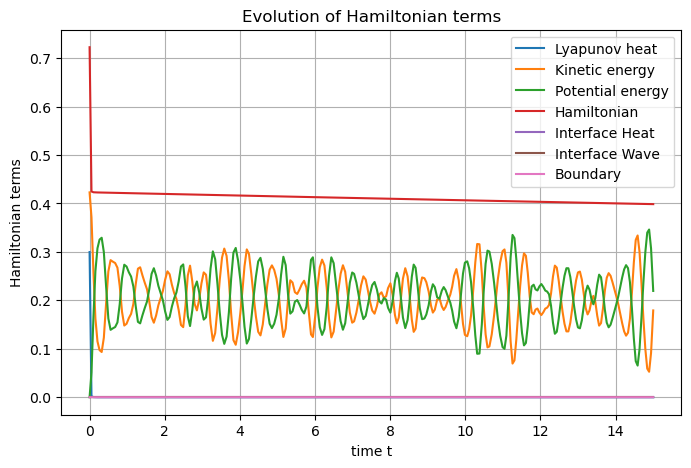

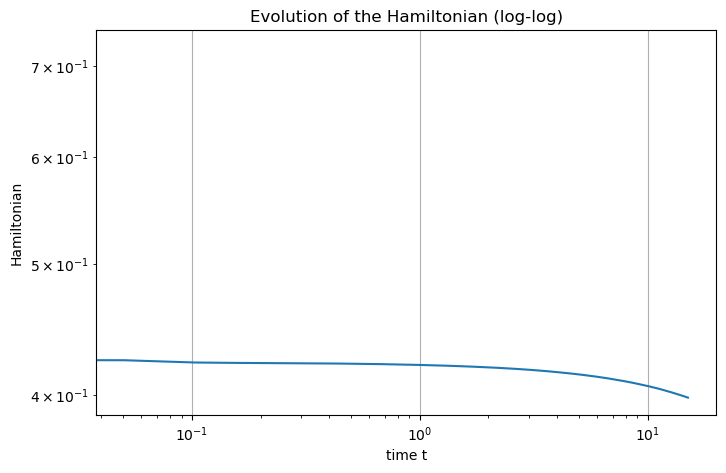

In [7]:
## Post-processing
## Set Hamiltonian's name
hw.hamiltonian.set_name("Hamiltonian")
# Define each Hamiltonian Term
terms = [
    S.Term("Lyapunov heat", "0.5*T*T", [heat_region]),
    S.Term("Kinetic energy", "0.5*p*p", [wave_region]),
    S.Term("Potential energy", "0.5*q.q", [wave_region]),
]
# Add them to the Hamiltonian
for term in terms:
    hw.hamiltonian.add_term(term)

# Plot the Hamiltonian and save the output
hw.plot_Hamiltonian(save_figure=True, filename="Hamiltonian_Heat"+str(heat_region)+"_Wave"+str(wave_region)+"_2D.png")

# Plot the Hamiltonian in log-log scale
t = hw.solution["t"]
Hamiltonian = hw.get_Hamiltonian()
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[8, 5])
ax = fig.add_subplot(111)
ax.loglog(t, Hamiltonian)
ax.grid(axis="both")
ax.set_xlabel("time t")
ax.set_ylabel("Hamiltonian")
ax.set_title("Evolution of the Hamiltonian (log-log)")
plt.show()